# Introduction to Regression

*Linear Model* merupakan salah satu teknik yang paling umum digunakan dalam *supervised learning*. 

Pada kertas kerja ini, kita akan membahas 3 model linear yang akan digunakan untuk *regression* dan *classification*. Sebelumnya, kita akan membahas mengenai permasalahan regresi terlebih dahulu dengan menggunakan persamaan linear.

## Regression
Terdapat 3 (tiga) jenis linear regresi yang digunakan, 

* Simple Linear Regression: <br>
Persamaan regresi linear sederhana hanya terdiri dari 2 parameter utama. Sehingga, persamaan tersebut dapat kita tuliskan sebagai berikut: $\displaystyle y=mx+b+\epsilon $.

* Multiple Linear Regression:<br>
Persamaan regresi ini memiliki banyak variabel, namun memiliki dimensi tinggi *higher order dimension*. Persamaan tersebut dapat dituliskan sebagai berikut: $\displaystyle y=m_{1} x_{1} +m_{2} x_{2} +m_{3} x_{3} +b+\epsilon $
    
* Polynomial Regression:<br>
Persamaan *polynomial* memiliki derajat fleksibilitas tinggi. Pada umumnya, garis yang terbentuk dari funsi persamaan terlihat seperti gelombang. Persamaan tersebut dapat dituliskan sebagai berikut:
$\displaystyle y=m_{1} x_{1} +m_{2} x^{2}_{2} +m_{3} x^{3}_{3} +m_{i} x^{n}_{i} +b$

### Simple Linear Regression 
Bagian ini akan mendiskusikan mengenai *Simple linear regression* dengan cara membuat data dan sebarannya, kemudian kita akan mencari nilai parameter $x$.

Pertama, lakukan import library yang dibutuhkan. Terdapat 2 *library* yang kita butuhkan yatu *numpy* dan *matplotlib*. *Numpy* digunakan untuk membuat variabel dalam bentuk matriks sedangkan *matplotlib* digunakan untuk mem-plot atau memvisualisasikan data dalam bentuk *chart*.


In [1]:
#Import library
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Buat data dummy
Pertama, kita akan men-generate 100 data *dummy* dengan memanfaatkan fungsi *uniform random distribution*. Data yang kita buat harus ke dalam rentang [0,1] dengan fungsi $ runif \in [0,1]$. Data ini akan digunakan sebagai input X.

In [2]:
# 100 samples uniform data
runif = np.random.uniform(size=100)
X = runif * 100

Berikutnya, kita akan menentukan koefisien *m* dan *b* dari persamaan linear, dan men-generate data *Y*. Di tahap ini kita akan memperkenalkan *noise* dalam data kita. *Noise* ini di-generate dari data distribusi random normal*(gaussian distribution)*.


In [3]:
# m and b coefficients
m,b = 4,6
# generate noise data
noise = np.random.normal(size=100) * 10
# generate Y data
Y = (m*X) + b + noise

Kedua data *X* dan *Y* memiliki bentuk **ndArray (Numpy Array)** sebagai bentuk *native* dari matriks.

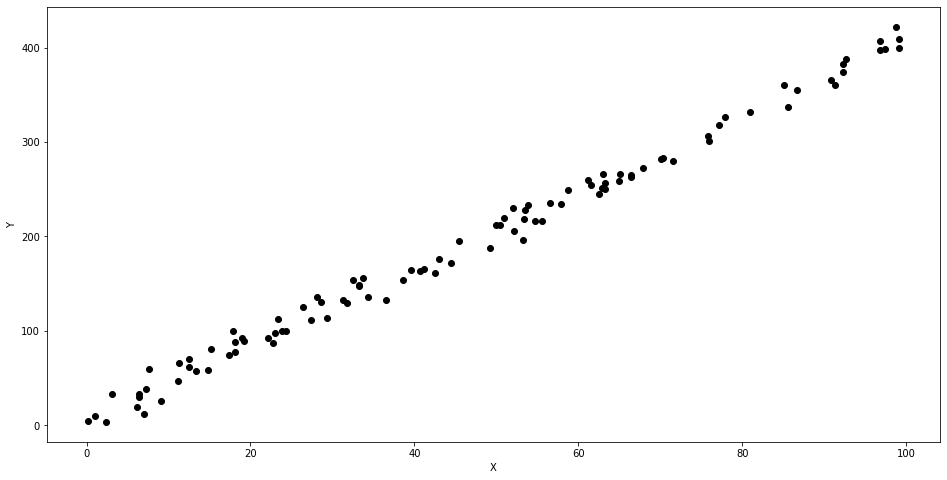

In [4]:
# Plot the data
plt.figure(figsize=(16, 8)) # setting dimensi plot
plt.xlabel('X') # nama label untuk x-axis
plt.ylabel('Y') # nama label untuk y-axis
plt.scatter(X, Y, c='black') # c='black' digunakan untuk setting warna setiap data
plt.show()

Untuk mencari linearlity kita bisa memanfaatkan rumus persamaan regresi linear berikut ini:
\begin{gather*}
m=\frac{\sum y_{i} x_{i} \ -\ \overline{y}\sum x_{i}}{\sum x^{2}_{i} -\overline{x}\sum x_{i}}\\
b=\frac{\overline{y}\sum x^{2}_{i} -\overline{x}\sum y_{i} x_{i}}{\sum x^{2}_{i} -\overline{x}\sum x_{i}}
\end{gather*}

Dengan rumus tersebut di atas, maka kita bisa mendapatkan koefisien *m* dan *b* secara mudah.
\begin{equation*}
\hat{y} \ =\ mx\ +\ b
\end{equation*}

Kali ini kita akan menuliskan persamaan tersebut ke dalam bentuk kode sumber berikut ini:

In [5]:
# compute the denominator as d
d = np.sum(X*X) - (X.mean() * np.sum(X))
# compute m and b coefficients
m_reg = (np.sum(X * Y) - Y.mean()*np.sum(X))/d
b_reg = (Y.mean() * np.sum(X * X) - X.mean() * np.sum(X * Y) )/ d

Setelah itu, kita bisa tampilkan estimasi dari koefisien *m* dan *b* yang kita dapatkan melalui rumus di atas.

In [6]:
print("Y = {0}x + {1}".format(m_reg,b_reg))

Y = 3.9928918532852187x + 6.95314620596931


Kita bisa tampilkan persamaan tersebut di atas ke dalam bentuk plot.

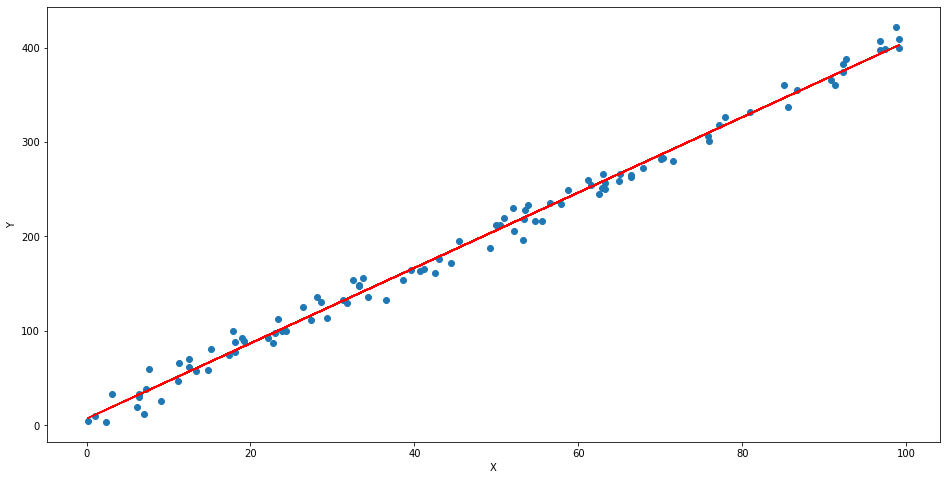

In [7]:
# compute the y_hat
Y_hat = m_reg*X + b_reg

# Plot the X, Y and Y_hat in one figure
plt.figure(figsize=(16, 8))
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X, Y)
plt.plot(X, Y_hat,c='red')
plt.show()

#### Simple Linear Regression dengan scikit learn
Sekarang, alih-alih kita menuliskan kode secara manual, kita dapat memanfaatkan library *scikit learn* untuk melakukan penghitungan linear regresi. Sekarang kita akan mencoba membandingkan performa dari *scikit learn* dengan metode yang kita buat sebelumnya. Pertama, kita perlu cek versi dari *scikit-learn* yang kita miliki. Gunakan versi 0.20 ke atas.

In [8]:
from sklearn import __version__ as skversion
print('The scikit-learn version is {}.'.format(skversion))

The scikit-learn version is 0.21.2.


*LinearRegression* merupakan salah satu kelas di dalam modul *linear_model* yang digunakan untuk regresi sederhana dan multiple. Secara umum, anatomi penggunaan dari *scikit-learn* hampir semua **sama** untuk model yang ada.

1. Buat objek model
2. Panggil fungsi **fit**
3. Panggil fungsi **predict** untuk memprediksi suatu input


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
model = LinearRegression()
model.fit(X, Y)
print("The linear model is: Y = {:.5}X + {:.5}".format(model.coef_[0][0], model.intercept_[0]))

The linear model is: Y = 3.9929X + 6.9531


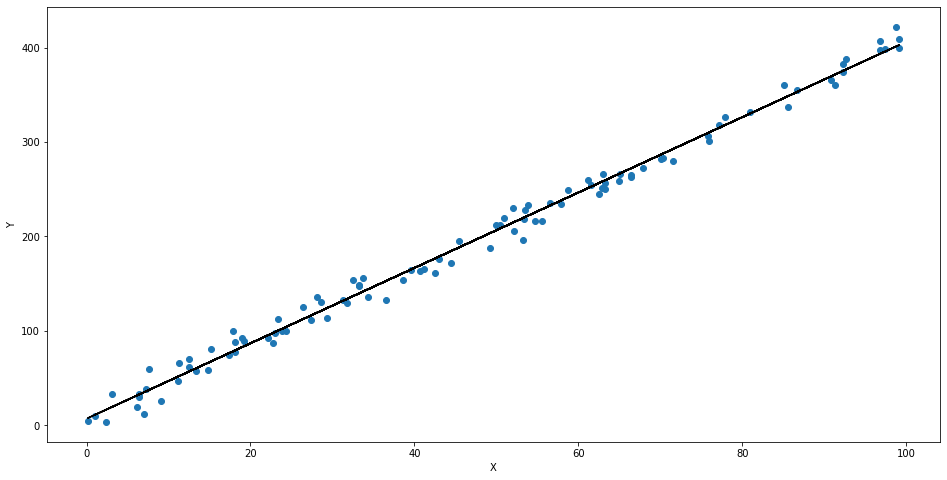

In [11]:
plt.figure(figsize=(16, 8))
plt.xlabel('X')
plt.ylabel('Y')

predictions = model.predict(X)
plt.scatter(X, Y)
plt.plot(X, predictions,c='black')
plt.show()



Dapat kita lihat dari gambar di atas, kita bisa lihat garis hitam sebagai garis regresi dimana parameternya dibentuk oleh *scikit-learn* melalui fungsi *fit*. 
<br>

#### Train, testing, split
Permasalahan muncul apabila kita ingin mengevaluasi performa dari model yang ingin kita gunakan apabila kita menggunakan seluruh data yang ada. Padahal, kita telah menggunakan keseluruhan data yang kita miliki untuk men-training model kita. Oleh karena itu, kita harus memecah antara data training dan data testing yang kita miliki. 

Kali ini , kita akan menggunakan metode `train_test_split` yang disediakan oleh `sklearn`. Pertama, kita membutuhkan 3 tambahan modul yaitu `metrics, pandas` dan `train_test_split`. `Metrics` berfungsi untuk mengukur performa model yang akan kita gunakan. Kemudian `pandas` akan kita gunakan untuk menampung pecahan data. Terakhir, `train_test_split` akan digunakan dengan menggunakan 20% dari data yang dimiliki.

In [12]:
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
model = LinearRegression()  
model.fit(X_train, y_train) #training the algorithm
print("The linear model is: Y = {:.5}X + {:.5}".format(model.coef_[0][0], model.intercept_[0]))

The linear model is: Y = 3.988X + 7.4299


Mari kita lihat seberapa jauh antara nilai sesungguhnya dengan nilai prediksi yang ada.

In [15]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,99.604405,104.570182
1,58.201120,66.440350
2,148.595309,140.186240
3,360.226772,346.570769
4,211.827052,206.841807
5,281.791404,286.907461
6,248.826947,241.628493
7,187.825231,203.499686
8,57.617630,60.664883
9,256.215247,259.767374


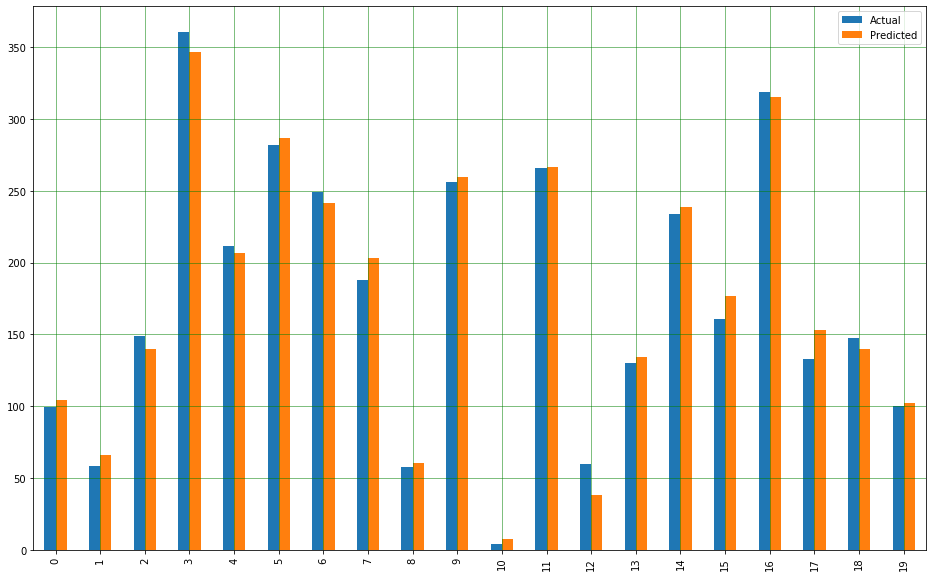

In [16]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Evaluasi Performa Model
Kali ini kita akan menggunakan 3 matriks pengukuran model di antaranya adalah *Mean Absolute Error (MEA), Mean Squared Error (MSE),* dan *Root Mean Squared Error (RMSE)*. 

1. Mean Aboslute Error (MEA) adalah nilai rata-rata absolut dari setiap hasil prediksi model. <br>
$\displaystyle MAE=\frac{1}{n}\sum ^{n} |y_{i} -\hat{y}_{i} |$
2. Mean Squared Error (MSE) adalah nilai rata-rata pangkat dua dari setiap hasil prediksi model.<br>
$\displaystyle MSE=\frac{1}{n}\sum ^{n}\left( y_{i} -\hat{y}^{2}_{i}\right)$
3. Root Mean Squared Error (RMSE) adalah akar dari MSE.<br>
$\displaystyle RMSE=\sqrt{\frac{1}{n}\sum ^{n}\left( y_{i} -\hat{y}^{2}_{i}\right)}$

In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 7.928358435480194
Mean Squared Error: 98.98757131957477
Root Mean Squared Error: 9.949249786771603
R squared value: 0.9888830843135477


Dari pengukuran hasil di atas, terlihat bahwa besar nilai MAE dan RMSE memiliki kemiripan dengan rentang sebesar 10-12 poin. Nilai ini merupakan hasil rata-rata pengukuran setiap *"kesalahan prediksi"* yang dilakukan oleh model, tentunya semakin kecil nilai ini semakin baik. Sedangkan, nilai R2 sebesar 98% menandakan bahwa sebanyak 98% nilai dapat dijelaskan oleh model kita.

### Multiple Linear Regression
Pada multiple linear regression, sebagaimana persamaan berikut $\displaystyle y=m_{1} x_{1} +m_{2} x_{2} +m_{3} x_{3} +b+\epsilon $. Kita akan menggunakan dataset `wine`.

In [18]:
from sklearn.utils import shuffle

In [19]:
df_wine = pd.read_csv('winequality.csv')
df_wine = shuffle(df_wine)
df_wine.reset_index(inplace=True, drop=True)

In [20]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Terdapat sebanyak 1599 data dalam dataset tersebut. Sekarang, Anda diminta untuk melakukan proses pembuatan model *multiple linear regression* dengan menggunakan cara yang sama seperti di atas. 

Hal yang pertama kali kita lakukan terhadap data ini adalah memisahkan antara data training dan data validasi. Ambil 99 data validasi untuk data validasi.

In [21]:
df_wine_validasi = df_wine.iloc[:99,:]
df_wine = df_wine.iloc[99:,:]

In [22]:
print('Jumlah data training:',len(df_wine))
print('Jumlah data validasi:',len(df_wine_validasi))

Jumlah data training: 1500
Jumlah data validasi: 99


Pertama, lakukan pemisahan antara *features* dengan *target* variable yang akan kita gunakan.

In [23]:
X = df_wine.iloc[:,:-1].values
Y = df_wine.iloc[:,-1].values

Lakukan `train_test_split` terhadap dataset dengan mengalokasikan 20% data testing.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Lakukan `fit` model atas data training, dan tampilkan koefisien dari masing-masing parameter terhadap fiturnya.

In [25]:
model.coef_

array([[3.98804074]])

In [26]:
# fit model
model = LinearRegression()  
model.fit(X_train, y_train)

# tampilkan parameter beserta fiturnya dalam satu bentuk dataframe
paramaters = pd.DataFrame(model.coef_, df_wine.columns[:-1], columns=['Coefficient'])
paramaters

,Coefficient
fixed acidity,0.050557
volatile acidity,-1.113488
citric acid,-0.162991
residual sugar,0.028638
chlorides,-1.505483
free sulfur dioxide,0.005212
total sulfur dioxide,-0.003510
density,-43.469085
pH,-0.230365
sulphates,0.921996


Tampilkan nilai prediksi dari data testing (*predicted*), dan tampilkan secara bersama-sama dengan nilai sesusungguhnya (*actual*).

In [27]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result.head(20)

,Actual,Predicted
0,5,6.399129
1,5,5.233326
2,6,5.058492
3,6,5.307477
4,5,5.457532
5,8,6.681984
6,6,5.573664
7,7,6.381154
8,6,5.668676
9,5,5.460053


Tampilkan grafik batang (*bar chart*) antara nilai *predicted* dan *actual*.

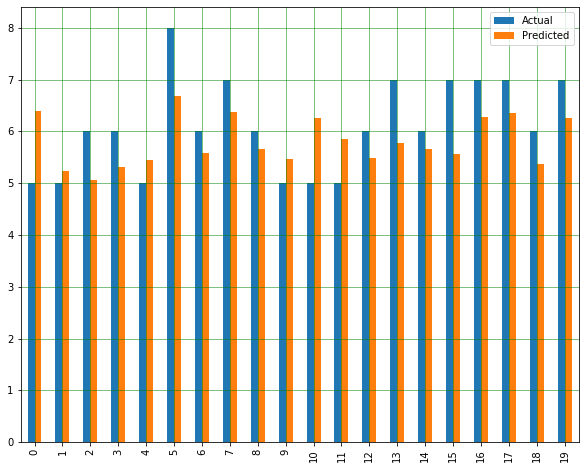

In [28]:
result.head(20).plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.5229251601548242
Mean Squared Error: 0.4437336890797701
Root Mean Squared Error: 0.6661333868526409
R squared value: 0.29610772671356267


#### Validasi atas model
Sekarang, kita akan menggunakan data validasi yang telah kita pisahkan sebelumnya yaitu `df_wine_validasi`.

In [30]:
X_wine_validasi_features = df_wine_validasi.iloc[:,:-1].values
Y_wine_validasi_label = df_wine_validasi.iloc[:,-1].values

In [31]:
Y_wine_validasi_pred = model.predict(X_wine_validasi_features)

In [32]:
Y_wine_validasi_pred

array([6.40798266, 5.24727596, 5.45331031, 5.73431272, 5.15256315,
       6.65119877, 5.35960153, 5.80783272, 5.99892381, 6.04610401,
       5.854403  , 5.34127596, 5.89638334, 6.46153232, 6.53107696,
       5.98213398, 5.18225584, 5.34279051, 5.94347782, 6.15711962,
       4.81761667, 5.15591481, 5.41463152, 5.00632724, 5.24498445,
       5.26171653, 5.06605302, 5.38383912, 6.17692092, 5.34326715,
       5.43391001, 5.73431272, 6.00585818, 6.37717648, 5.21769123,
       4.85412505, 4.75493878, 5.70297015, 5.35210296, 6.23231669,
       5.30014572, 5.79867257, 5.23332643, 5.36756034, 5.67277694,
       6.42782942, 5.50463648, 5.66371113, 5.98124702, 5.88298327,
       5.80788958, 6.84674907, 5.2383498 , 4.86939497, 5.75164147,
       5.31123398, 5.43391001, 5.11239942, 6.36136022, 5.84865254,
       6.06600456, 6.35259278, 6.03360494, 5.14743851, 5.80052283,
       5.56447907, 5.3184264 , 5.31804333, 5.70923   , 5.1145927 ,
       5.71809632, 5.04822228, 4.71962282, 5.64842905, 5.75480

In [33]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(Y_wine_validasi_label, Y_wine_validasi_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_wine_validasi_label, Y_wine_validasi_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_wine_validasi_label, Y_wine_validasi_pred)))
print('R squared value:', metrics.r2_score(Y_wine_validasi_label,Y_wine_validasi_pred))

Mean Squared Error: 0.4968025308021778
Root Mean Squared Error: 0.7048422027675256
R squared value: 0.06721042061453142


### Polynomial Regression
Sekarang kita akan menggunakan *polynomial regression* dengan cara membandingkan performa dari model sebelumnya kita gunakan.

Untuk itu kita akan gunakan data dummy

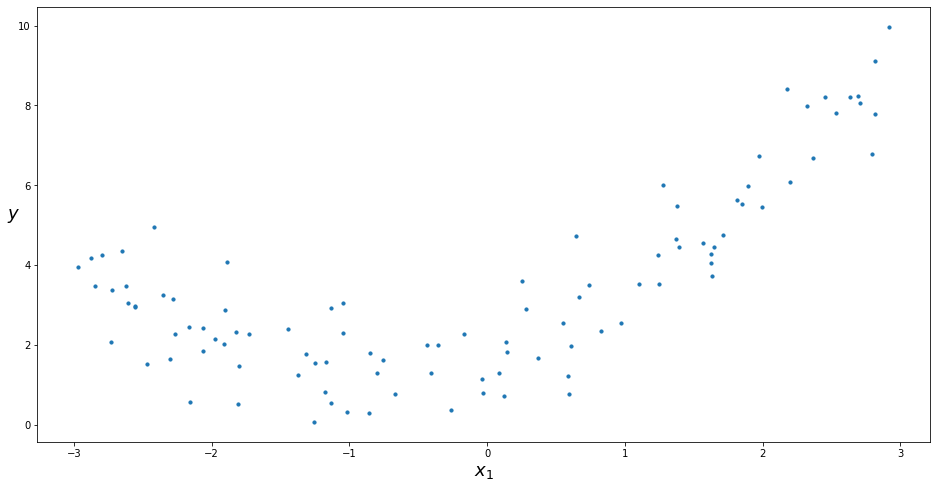

In [34]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, s=10)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#### Simple Linear

In [35]:
model = LinearRegression()
model.fit(X, y)
model.intercept_, model.coef_

(array([3.56401543]), array([[0.84362064]]))

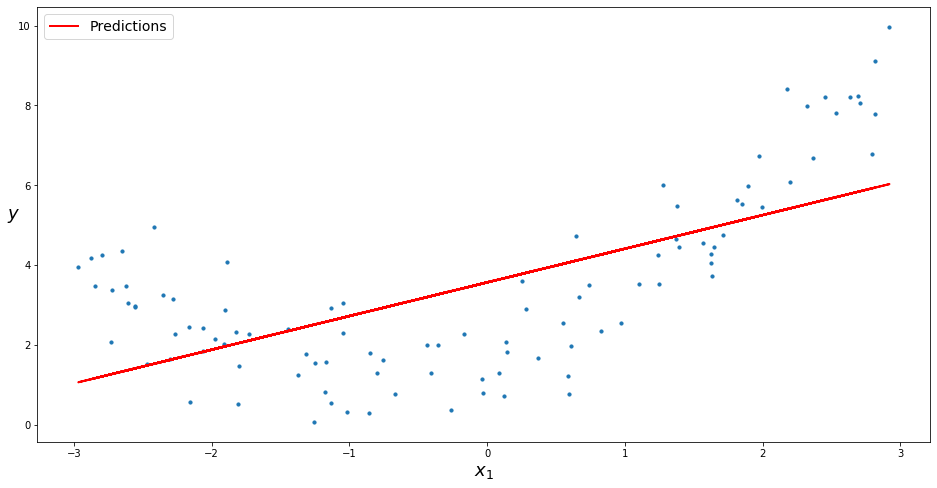

In [36]:
y_new = model.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, s=10)
plt.plot(X, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

#### Polynomial 
Sekarang kita akan menggunakan model polynomial

In [37]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [38]:
X_poly[0]


array([-0.75275929,  0.56664654])

In [39]:
model = LinearRegression()
model.fit(X_poly, y)
model.intercept_, model.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Dari data tersebut di atas maka persamaan *polynomial* nya adalah $\displaystyle \hat{y} =0.56x^{2}_{1} +0.93x_{1} +1.78$

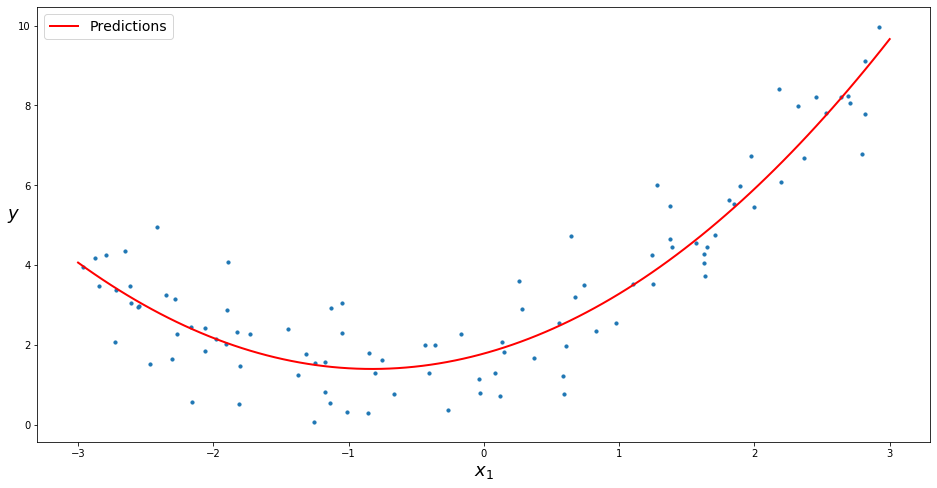

In [40]:
# generate 100 data dari titik -3 sampai titik 3, kemudian ubah dimensinya menjadi 100 X 1
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, s=10)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

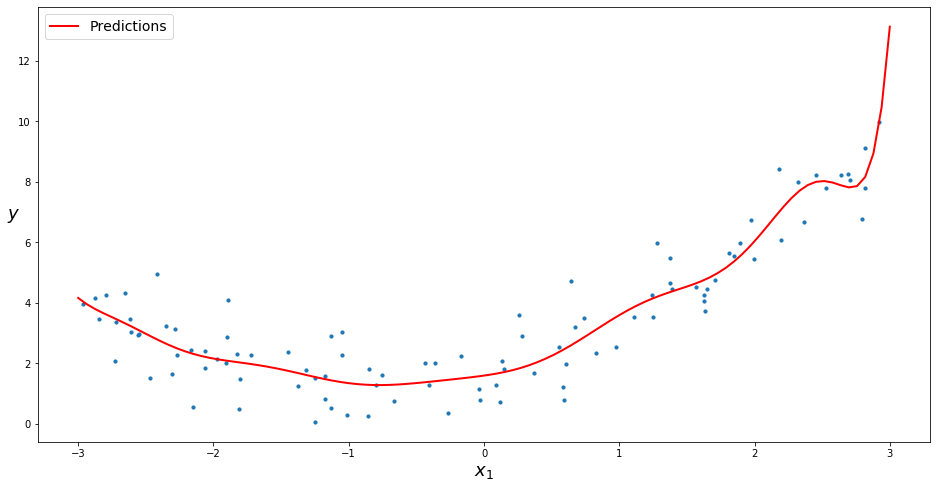

In [41]:
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, s=10)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

### Evaluasi model
Anda silakan menghitung Nilai MSE, MAE dan RMSE serta R-squared untuk masing-masing jumlah polynomial yang Anda tentukan sendiri menggunakan langkah-langkah di atas.

## Ridge and Lasso Regression
Di sini kita akan mempelajari mengenai perbedaan hasil antara standard linear regression (multiple) dengan ridge dan lasso regression. Data yang digunakan adalah data penjualan yang mungkin dipengaruhi oleh biaya yang dikeluarkan untuk iklan di Radio, Koran dan TV. 

In [42]:
# load data
df_adv = pd.read_csv('Advertising.csv')

In [43]:
df_adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Hilangkan kolom pertama, karena itu hanya urutan saja. Silakan pilih diantara kedua cara ini
``` python
    df_adv.drop(df_adv.columns[0], axis=1, inplace=True)
    df_adv.drop(['Unnamed: 0'], axis=1, inplace=True)
```

In [44]:
df_adv.drop(df_adv.columns[0], axis=1, inplace=True)

In [45]:
df_adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [46]:
df_adv.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Sekarang kita akan membuat plot untuk predictor dan target variable.

In [47]:
def scatter_plot(data, feature, target):
    plt.figure(figsize=(16, 8))
    plt.scatter(
        data[feature],
        data[target],
        c='black'
    )
    plt.xlabel("Money spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

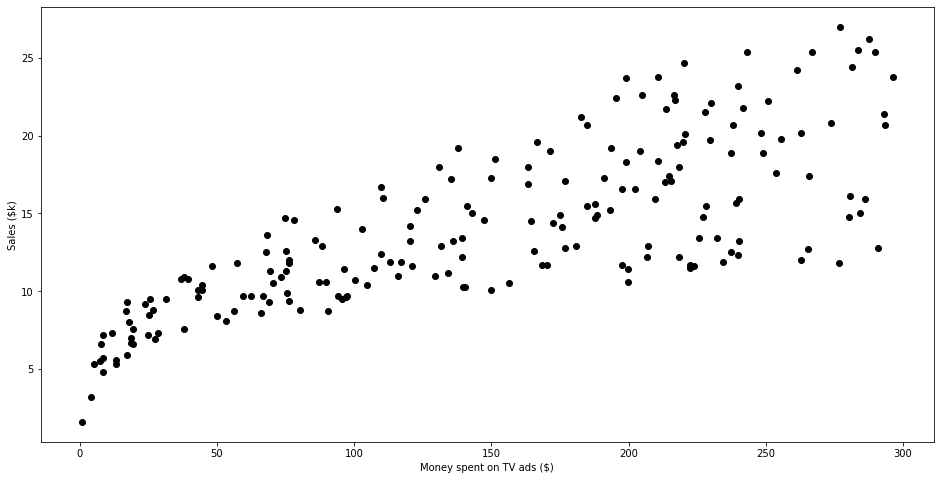

In [48]:
scatter_plot(df_adv, 'TV','sales')

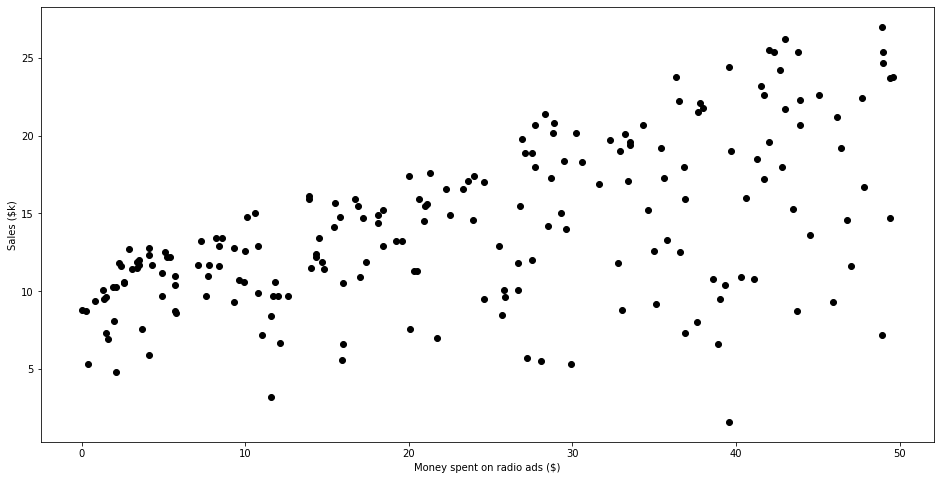

In [49]:
scatter_plot(df_adv, 'radio','sales')

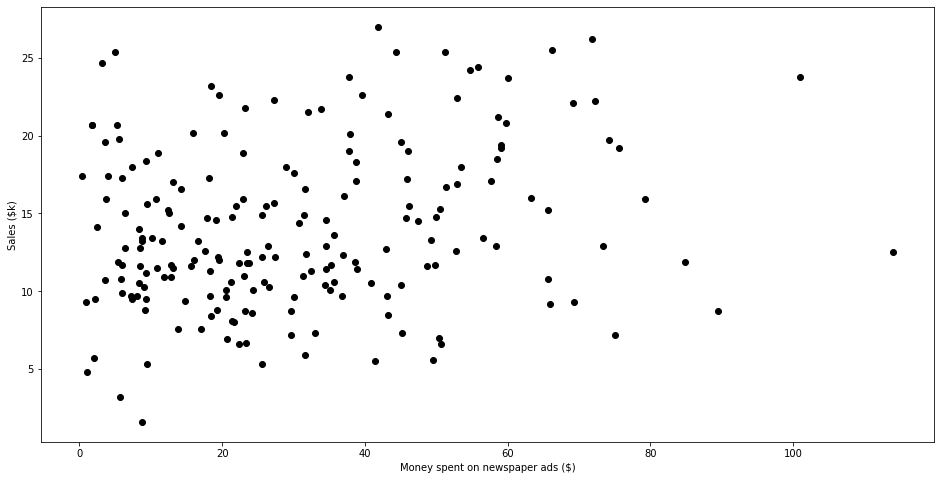

In [50]:
scatter_plot(df_adv, 'newspaper','sales')

### Multiple linear regression

In [51]:
from sklearn.model_selection import cross_val_score

Xs = df_adv.drop(['sales'], axis=1)
y = df_adv['sales'].values.reshape(-1,1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

-3.07294659710021


### Ridge 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [53]:
ridge_regressor.best_score_


-3.0726713383411433

### Lasso

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv = 5)

lasso_regressor.fit(Xs, y)

C:\Users\PP7LAB8124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202.6330184067651, tolerance: 0.43829494374999994
  positive)
C:\Users\PP7LAB8124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228.2169839442834, tolerance: 0.45029244375
  positive)
C:\Users\PP7LAB8124\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.3201080483578, tolerance: 0.41992074374999994
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [55]:
lasso_regressor.best_score_


-3.041405896751369

## Logistic Regression
Sebagaimana kita ketahui Logistic Regression digunakan untuk melakukan fungsi klasifikasi. Klasifikasi adalah proses penentuan kelas atas suatu data berdasarkan fitur-fiturnya. Hasil penghitungan *Logistic Regression* berupa nilai probabilitas.

Untuk contoh pertama kita akan menggunakan data sederhana yang menunjukkan hubungan antara jumlah waktu belajar sekelompok mahasiswa dengan tingkat kelulusannya. 

In [56]:
# Import library
from sklearn.linear_model import LogisticRegression

In [57]:
df_study = pd.read_csv('StudyHours_Pass.csv')
df_study.head()

,Hours,Pass
0,0.50,Tidak Lulus
1,0.75,Tidak Lulus
2,1.00,Tidak Lulus
3,1.25,Tidak Lulus
4,1.75,Tidak Lulus


Sebelum dilakukan Dari data di atas, kita ingin mengetahui ada berapa nilai atribut yang ada di dalam kolom `Pass`? Hal ini menjadi penting, karena kita ingin mengetahui bentuk nilai dari kolom tersebut.

In [58]:
df_study.Pass.unique()

array(['Tidak Lulus', 'Lulus'], dtype=object)

#### Encoding
Dalam *Machine Learning*, kata dan huruf sulit tidak bisa secara langsung digunakan di dalam proses pembelajaran *(learning)*. Oleh karena itu, dibutuhkan suatu mekanisme untuk mengubahnya menjadi angka. 

Untuk data kategorikal (salah satunya adalah binary), kita bisa menggunakan modul `label_encoder` untuk mengubahnya menjadi angka atau kita bisa membuatnya secara manual. Berikut ini adalah kode untuk mengubahnya secara manual.

```python
df_lr.Pass.replace(to_replace={'Tidak Lulus':0, 'Lulus':1}, inplace=True)
```

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
le.fit(df_study['Pass'])

LabelEncoder()

In [61]:
list(le.classes_)

['Lulus', 'Tidak Lulus']

In [62]:
le.transform(df_study['Pass'])

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

Kita lakukan proses transformasi data.

In [63]:
df_study.Pass = le.transform(df_study['Pass'])
# df_study.Pass = LabelEncoder().fit_transform(df_study['Pass'])

Pisahkan antara target variabel dengan variabel bebas. Gunakan method `values` dan `reshape` karena model baru akan efisien ketika menerima data berupa `ndarray`. 

In [64]:
X = df_study.Hours.values.reshape(-1,1)
y = df_study.Pass.values.reshape(-1,)

In [65]:
LogReg = LogisticRegression(solver='lbfgs',random_state=40)
LogReg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=40, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
X[0]

array([0.5])

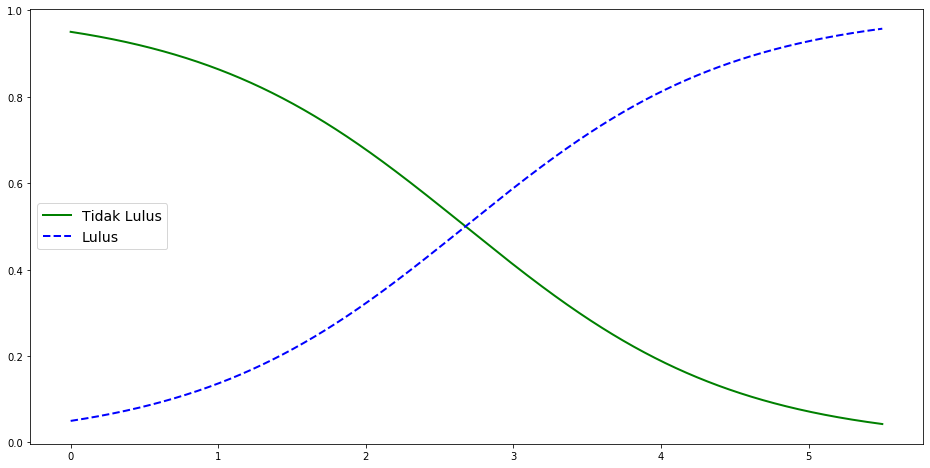

In [67]:
X_new = np.linspace(0, 5.5, 1000).reshape(-1, 1)
y_proba = LogReg.predict_proba(X_new)

plt.figure(figsize=(16, 8))

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Tidak Lulus")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Lulus")

plt.legend(loc="center left", fontsize=14)

Dapat dilihat pada grafik di atas, `decision boundary` yang cukup jelas pada menjelang angka 3. Di samping itu, nilai probabilitas kelulusan akan meningkat seiring dengan jumlah waktu belajar yang dialokasikan.